# Training set/ Test Set


In [1]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import random

In [2]:
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

#test set
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [None, 3])
    Y = tf.placeholder(tf.float32, shape = [None, 3])
    nb_classes = 3

    W = tf.Variable(tf.random_normal([3, nb_classes]), name = 'weight')
    b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')


    logits = tf.matmul(X, W) + b

    hypothesis = tf.nn.softmax(logits)

    #cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y)
    #cost = tf.reduce_mean(cost_i)
    cost = tf.reduce_sum(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))


    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.argmax(hypothesis, 1)
correct = tf.equal(predicted, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32)) * 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost, W, optimizer], feed_dict = {X: x_data, Y: y_data})
        print(step, cost_val,'\n', W_val,'\n')
            
    #test
    pre, cor, acc = sess.run([predicted, correct, accuracy], feed_dict = {X: x_test, Y: y_test})
    print("predicted : {}, correct : {}, accuracy : {}%".format(pre, cor, acc))
    
        

0 37.7608 
 [[ 0.56195629  0.77234346  0.05909887]
 [ 1.39302015  1.01510322 -1.98517525]
 [ 1.1534363   1.30966341 -2.36847186]] 

1 60.4221 
 [[ 0.16521189  0.86908877  0.35909796]
 [-0.07201421  1.68013954 -1.18517709]
 [-0.22118878  1.98428941 -1.66847277]] 

2 102.575 
 [[ 0.36506051  0.36924613  0.65909201]
 [ 1.22768021 -0.41954303 -0.38518906]
 [ 1.07865679 -0.01555026 -0.96847874]] 

3 66.5442 
 [[-0.23320991  0.66851711  0.9580915 ]
 [-0.96878576  0.97894979  0.41278404]
 [-1.11949265  1.48362732 -0.26950711]] 

4 74.7876 
 [[-0.03324839  0.18691048  1.23973668]
 [ 0.33113682 -1.0822978   1.17410886]
 [ 0.18046844 -0.49582469  0.40998381]] 

5 72.7208 
 [[ 0.16460381  0.48688126  0.74191368]
 [ 1.62604082  0.31764245 -1.52073514]
 [ 1.47530055  1.00414145 -2.3848145 ]] 

6 73.8562 
 [[-0.42902678  0.78052449  1.04190099]
 [-0.560058    1.70376647 -0.72076052]
 [-0.71367359  2.4931283  -1.68482709]] 

7 119.787 
 [[-0.22903396  0.28057155  1.34186113]
 [ 0.73992777 -0.39613926

89 46.202 
 [[-4.24515724  0.13170403  5.50685215]
 [ 1.63823259 -1.61476338  0.39947897]
 [ 1.06737995  0.29429781 -1.26705003]] 

90 40.5317 
 [[-4.31556892  0.43165505  5.27731276]
 [ 1.16540015 -0.21486306 -0.52758873]
 [ 0.72975373  1.79405451 -2.42918062]] 

91 21.4674 
 [[-4.11694336  0.10544863  5.40489388]
 [ 2.45617199 -1.88797772 -0.14524576]
 [ 2.02263474  0.0465312  -1.97453833]] 

92 71.6713 
 [[-4.51930094  0.40544558  5.5072546 ]
 [ 0.74887252 -0.48798442  0.16206032]
 [ 0.12046075  1.54651845 -1.57235146]] 

93 22.3549 
 [[-4.31933451  0.23408641  5.47864723]
 [ 2.04865026 -1.47747731 -0.14822465]
 [ 1.42028606  0.4336555  -1.7593137 ]] 

94 39.6461 
 [[-4.6243763   0.53202623  5.48574924]
 [ 0.59754872 -0.08169961 -0.0929009 ]
 [-0.06343555  1.92346382 -1.76540053]] 

95 40.6748 
 [[-4.42437649  0.22948429  5.58829117]
 [ 1.89754832 -1.68904102  0.21444112]
 [ 1.23656404  0.22175765 -1.36369395]] 

96 43.3424 
 [[-4.60533381  0.5294143   5.46931839]
 [ 0.80391645 -0.2

181 19.7719 
 [[-6.88909197  1.80217302  6.48031807]
 [ 1.95450771 -1.94192219  0.41036373]
 [ 2.70239353 -0.63725936 -1.97050631]] 

182 55.2488 
 [[-7.1318078   2.10215378  6.42305326]
 [ 0.67054057 -0.54196167  0.29437029]
 [ 1.49179089  0.86264563 -2.25980878]] 

183 13.5078 
 [[-6.93274164  1.8889457   6.4371953 ]
 [ 1.96414793 -1.69663894  0.15544023]
 [ 2.78563595 -0.4331938  -2.25781441]] 

184 48.8103 
 [[-7.24384689  2.18876934  6.44847679]
 [ 0.51915789 -0.29701769  0.2008089 ]
 [ 1.25307524  1.06595504 -2.22440243]] 

185 26.0783 
 [[-7.04384995  1.8981837   6.53906536]
 [ 1.81913865 -1.85799122  0.46180171]
 [ 2.55305767 -0.58944809 -1.86898172]] 

186 49.4735 
 [[-7.23522997  2.19815755  6.43047142]
 [ 0.69030643 -0.45804441  0.19068703]
 [ 1.5966332   0.91042256 -2.4124279 ]] 

187 15.068 
 [[-7.03586102  1.91429043  6.51496935]
 [ 1.98598766 -1.98392487  0.42088628]
 [ 2.89252615 -0.71397185 -2.0839262 ]] 

188 58.2316 
 [[-7.31240463  2.21427751  6.49152613]
 [ 0.62706

# Non-normalized inputs
- need nomalization/ regularization

## 데이터 안에 비정상적으로 큰 수가 있는경우

case1) Not normalized

In [3]:
xy = np.array([[828.6559973, 833.450012, 908100, 828.349976, 831.659973],
             [823.02002, 828, 1828100, 821, 828],
             [819, 824, 1438100, 818, 824],
             [816, 820, 1008100, 815, 819],
             [819, 823, 1188100, 818, 818],
             [819, 823, 1198100, 816, 820],
             [811, 815, 1098100, 809, 812],
             [809, 816, 1398100, 804, 809]])

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, shape = [None, 4])
    Y = tf.placeholder(tf.float32, shape = [None, 1])
    W = tf.Variable(tf.random_normal([4,1]), name = 'weight')
    b = tf.Variable(tf.random_normal([1]), name = 'bias')

    hypothesis = tf.matmul(X,W) + b
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, optimizer], feed_dict ={X: x_data, Y: y_data})
        print(step, "\ncost : {} \n prediction : \n {}".format(cost_val, hy_val))

0 
cost : 416231129088.0 
 prediction : 
 [[ 455727.96875]
 [ 917200.875  ]
 [ 721574.875  ]
 [ 505884.625  ]
 [ 596174.     ]
 [ 601189.3125 ]
 [ 551027.1875 ]
 [ 701506.8125 ]]
1 
cost : 4.573051087748387e+32 
 prediction : 
 [[ -1.50846188e+16]
 [ -3.03668834e+16]
 [ -2.38885329e+16]
 [ -1.67457339e+16]
 [ -1.97357419e+16]
 [ -1.99018541e+16]
 [ -1.82407390e+16]
 [ -2.32240865e+16]]
2 
cost : inf 
 prediction : 
 [[  5.00000031e+26]
 [  1.00655139e+27]
 [  7.91817709e+26]
 [  5.55059947e+26]
 [  6.54167883e+26]
 [  6.59673867e+26]
 [  6.04613878e+26]
 [  7.69793698e+26]]
3 
cost : inf 
 prediction : 
 [[ -1.65731752e+37]
 [ -3.33635015e+37]
 [ -2.62458640e+37]
 [ -1.83982105e+37]
 [ -2.16832751e+37]
 [ -2.18657787e+37]
 [ -2.00407434e+37]
 [ -2.55158493e+37]]
4 
cost : inf 
 prediction : 
 [[ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]
 [ inf]]
5 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
6 
cost : nan 
 prediction : 
 [[ n

118 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
119 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
120 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
121 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
122 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
123 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
124 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
125 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
126 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
127 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
128 
cost : nan 
 pr

226 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
227 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
228 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
229 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
230 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
231 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
232 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
233 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
234 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
235 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
236 
cost : nan 
 pr

351 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
352 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
353 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
354 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
355 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
356 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
357 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
358 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
359 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
360 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
361 
cost : nan 
 pr

462 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
463 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
464 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
465 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
466 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
467 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
468 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
469 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
470 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
471 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
472 
cost : nan 
 pr

585 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
586 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
587 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
588 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
589 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
590 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
591 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
592 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
593 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
594 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
595 
cost : nan 
 pr

706 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
707 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
708 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
709 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
710 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
711 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
712 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
713 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
714 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
715 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
716 
cost : nan 
 pr

828 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
829 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
830 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
831 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
832 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
833 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
834 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
835 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
836 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
837 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
838 
cost : nan 
 pr

952 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
953 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
954 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
955 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
956 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
957 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
958 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
959 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
960 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
961 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
962 
cost : nan 
 pr

 [ nan]]
1074 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1075 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1076 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1077 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1078 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1079 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1080 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1081 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1082 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1083 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1

1209 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1210 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1211 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1212 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1213 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1214 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1215 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1216 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1217 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1218 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1219 
cost

1338 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1339 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1340 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1341 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1342 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1343 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1344 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1345 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1346 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1347 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1348 
cost

1473 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1474 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1475 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1476 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1477 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1478 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1479 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1480 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1481 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1482 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1483 
cost

 [ nan]]
1599 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1600 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1601 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1602 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1603 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1604 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1605 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1606 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1607 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1608 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1

1739 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1740 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1741 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1742 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1743 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1744 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1745 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1746 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1747 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1748 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1749 
cost

1873 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1874 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1875 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1876 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1877 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1878 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1879 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1880 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1881 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1882 
cost : nan 
 prediction : 
 [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
1883 
cost

case2) normalized

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
with tf.device('/cpu:0'): 
    # placeholders for a tensor that will be always fed.
    X = tf.placeholder(tf.float32, shape=[None, 4])
    Y = tf.placeholder(tf.float32, shape=[None, 1])

    W = tf.Variable(tf.random_normal([4, 1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')

    # Hypothesis
    hypothesis = tf.matmul(X, W) + b

    # Simplified cost/loss function
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    # Minimize
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
    train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[ 0.99999999  0.99999999  0.          1.          1.        ]
 [ 0.70548491  0.70439552  1.          0.71881782  0.83755791]
 [ 0.54412549  0.50274824  0.57608696  0.606468    0.6606331 ]
 [ 0.33890353  0.31368023  0.10869565  0.45989134  0.43800918]
 [ 0.51436     0.42582389  0.30434783  0.58504805  0.42624401]
 [ 0.49556179  0.42582389  0.31521739  0.48131134  0.49276137]
 [ 0.11436064  0.          0.20652174  0.22007776  0.18597238]
 [ 0.          0.07747099  0.5326087   0.          0.        ]]
0 Cost:  0.667562 
Prediction:
 [[-0.65320992]
 [ 0.11432887]
 [-0.08218994]
 [-0.26869342]
 [-0.24211724]
 [-0.14500059]
 [-0.07532927]
 [ 0.33376041]]
1 Cost:  0.667522 
Prediction:
 [[-0.653171  ]
 [ 0.11436381]
 [-0.08216063]
 [-0.26867059]
 [-0.24209006]
 [-0.14497444]
 [-0.07531281]
 [ 0.3337757 ]]
2 Cost:  0.667482 
Prediction:
 [[-0.6531322 ]
 [ 0.11439884]
 [-0.08213136]
 [-0.26864773]
 [-0.24206285]
 [-0.14494833]
 [-0.07529635]
 [ 0.33379096]]
3 Cost:  0.667441 
Prediction:
 [[-0

72 Cost:  0.664663 
Prediction:
 [[-0.65041548]
 [ 0.11684669]
 [-0.08008211]
 [-0.26705024]
 [-0.2401613 ]
 [-0.14312252]
 [-0.07414576]
 [ 0.33485958]]
73 Cost:  0.664622 
Prediction:
 [[-0.65037674]
 [ 0.11688159]
 [-0.08005287]
 [-0.26702744]
 [-0.24013419]
 [-0.14309645]
 [-0.07412934]
 [ 0.33487484]]
74 Cost:  0.664582 
Prediction:
 [[-0.65033793]
 [ 0.11691652]
 [-0.08002366]
 [-0.26700464]
 [-0.24010704]
 [-0.1430704 ]
 [-0.07411292]
 [ 0.33489007]]
75 Cost:  0.664542 
Prediction:
 [[-0.65029919]
 [ 0.11695148]
 [-0.07999443]
 [-0.26698184]
 [-0.24007991]
 [-0.14304434]
 [-0.0740965 ]
 [ 0.33490533]]
76 Cost:  0.664502 
Prediction:
 [[-0.65026045]
 [ 0.11698639]
 [-0.07996512]
 [-0.26695904]
 [-0.24005279]
 [-0.14301829]
 [-0.07408009]
 [ 0.33492059]]
77 Cost:  0.664462 
Prediction:
 [[-0.65022171]
 [ 0.11702134]
 [-0.07993592]
 [-0.26693621]
 [-0.24002562]
 [-0.14299224]
 [-0.07406367]
 [ 0.33493581]]
78 Cost:  0.664422 
Prediction:
 [[-0.65018284]
 [ 0.11705624]
 [-0.07990665

# MNIST Dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch : 0001 cost = 2.807280889
Epoch : 0002 cost = 1.099870353
Epoch : 0003 cost = 0.876664601
Epoch : 0004 cost = 0.767661002
Epoch : 0005 cost = 0.699614568
Epoch : 0006 cost = 0.652204058
Epoch : 0007 cost = 0.615678738
Epoch : 0008 cost = 0.586883042
Epoch : 0009 cost = 0.563620566
Epoch : 0010 cost = 0.543582608
Epoch : 0011 cost = 0.526366458
Epoch : 0012 cost = 0.511480014
Epoch : 0013 cost = 0.498083276
Epoch : 0014 cost = 0.486701800
Epoch : 0015 cost = 0.475601213
Accuracy :  0.886
Label : [2]
prediction: [2]


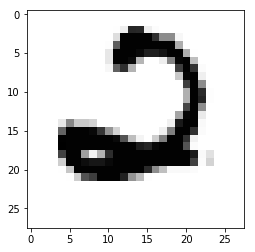

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
#one hot 인코딩 처리 안해도 불러올때 자동으로 onehot 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

nb_classes = 10
with tf.device('/cpu:0'): 
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, nb_classes])
    W = tf.Variable(tf.random_normal([784, nb_classes]), name = 'weight')
    b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

    hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

    cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis =1))

    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#parameter
# 데이터가 많기 때문에 한꺼번에 학습시키지 않고 몇개로 나누어서 학습시킨다. 
# epoch  : 전체 데이터를 한번 학습시키면 1 epoch라고 한다. 
# 전체 데이터에서 몇개로 나누면 batch_size
# 만약 1000개의 데이터샘플에서 batch_size 가 500일경우 1 epoch를 완료하는데에 iteration은 2번이 필요하다.
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict = {X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print("Epoch : {:04d} cost = {:.9f}".format(epoch+1, avg_cost))
    #accuracy report
    #sess.run없이 돌리는 방법       
    print("Accuracy : ", accuracy.eval(session = sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label :", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()